# German Credit Data

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import scipy
import seaborn as sns
import math
import sklearn
import scipy

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,make_scorer,ConfusionMatrixDisplay,recall_score ,classification_report,accuracy_score,f1_score


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


# change the trees

## Loading Data

In [53]:
# Dataset = pd.read_csv("Classification_Datasets/4_German_Credit_Data/German_Credit_Data.data-numeric", delimiter='.', header=None) 
Dataset = np.loadtxt('Classification_Datasets/4_German_Credit_Data/German_Credit_Data.data-numeric')

In [54]:
data = pd.DataFrame(Dataset)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,6.0,4.0,12.0,5.0,5.0,3.0,4.0,1.0,67.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,2.0,48.0,2.0,60.0,1.0,3.0,2.0,2.0,1.0,22.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
2,4.0,12.0,4.0,21.0,1.0,4.0,3.0,3.0,1.0,49.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,42.0,2.0,79.0,1.0,4.0,3.0,4.0,2.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,24.0,3.0,49.0,1.0,3.0,3.0,4.0,4.0,53.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


## Data preparation and Analysis

In [55]:
print(np.count_nonzero(data==np.nan ))
print(np.count_nonzero(data=="?"))
data.isnull().sum()

0
0


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64

In [56]:
frequency = data.iloc[:,-1].value_counts()
print(frequency)
print("-------")

1.0    700
2.0    300
Name: 24, dtype: int64
-------


<AxesSubplot:xlabel='24', ylabel='count'>

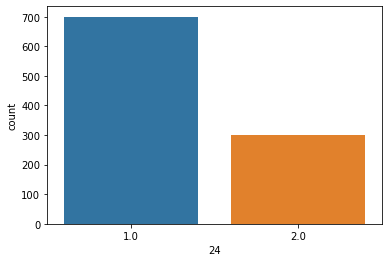

In [57]:
sns.countplot(x=24, data= data)

In [58]:
print(data.columns)
print(data.shape)

RangeIndex(start=0, stop=25, step=1)
(1000, 25)


In [59]:
data.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
dtype: object

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   object
 2   2       1000 non-null   object
 3   3       1000 non-null   object
 4   4       1000 non-null   object
 5   5       1000 non-null   object
 6   6       1000 non-null   object
 7   7       1000 non-null   object
 8   8       1000 non-null   object
 9   9       1000 non-null   object
 10  10      1000 non-null   object
 11  11      1000 non-null   object
 12  12      1000 non-null   object
 13  13      1000 non-null   object
 14  14      1000 non-null   object
 15  15      1000 non-null   object
 16  16      1000 non-null   object
 17  17      1000 non-null   object
 18  18      1000 non-null   object
 19  19      1000 non-null   object
 20  20      1000 non-null   object
 21  21      1000 non-null   object
 22  22      1000 non-null   o

In [61]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1000.0,2.577,1.257638,1.0,1.0,2.0,4.0,4.0
1,1000.0,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
2,1000.0,2.545,1.083120,0.0,2.0,2.0,4.0,4.0
3,1000.0,32.711,28.252605,2.0,14.0,23.0,40.0,184.0
4,1000.0,2.105,1.580023,1.0,1.0,1.0,3.0,5.0
5,1000.0,3.384,1.208306,1.0,3.0,3.0,5.0,5.0
6,1000.0,2.682,0.708080,1.0,2.0,3.0,3.0,4.0
7,1000.0,2.845,1.103718,1.0,2.0,3.0,4.0,4.0
8,1000.0,2.358,1.050209,1.0,1.0,2.0,3.0,4.0
9,1000.0,35.546,11.375469,19.0,27.0,33.0,42.0,75.0


In [62]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,6.0,4.0,12.0,5.0,5.0,3.0,4.0,1.0,67.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,2.0,48.0,2.0,60.0,1.0,3.0,2.0,2.0,1.0,22.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
2,4.0,12.0,4.0,21.0,1.0,4.0,3.0,3.0,1.0,49.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,42.0,2.0,79.0,1.0,4.0,3.0,4.0,2.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,24.0,3.0,49.0,1.0,3.0,3.0,4.0,4.0,53.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


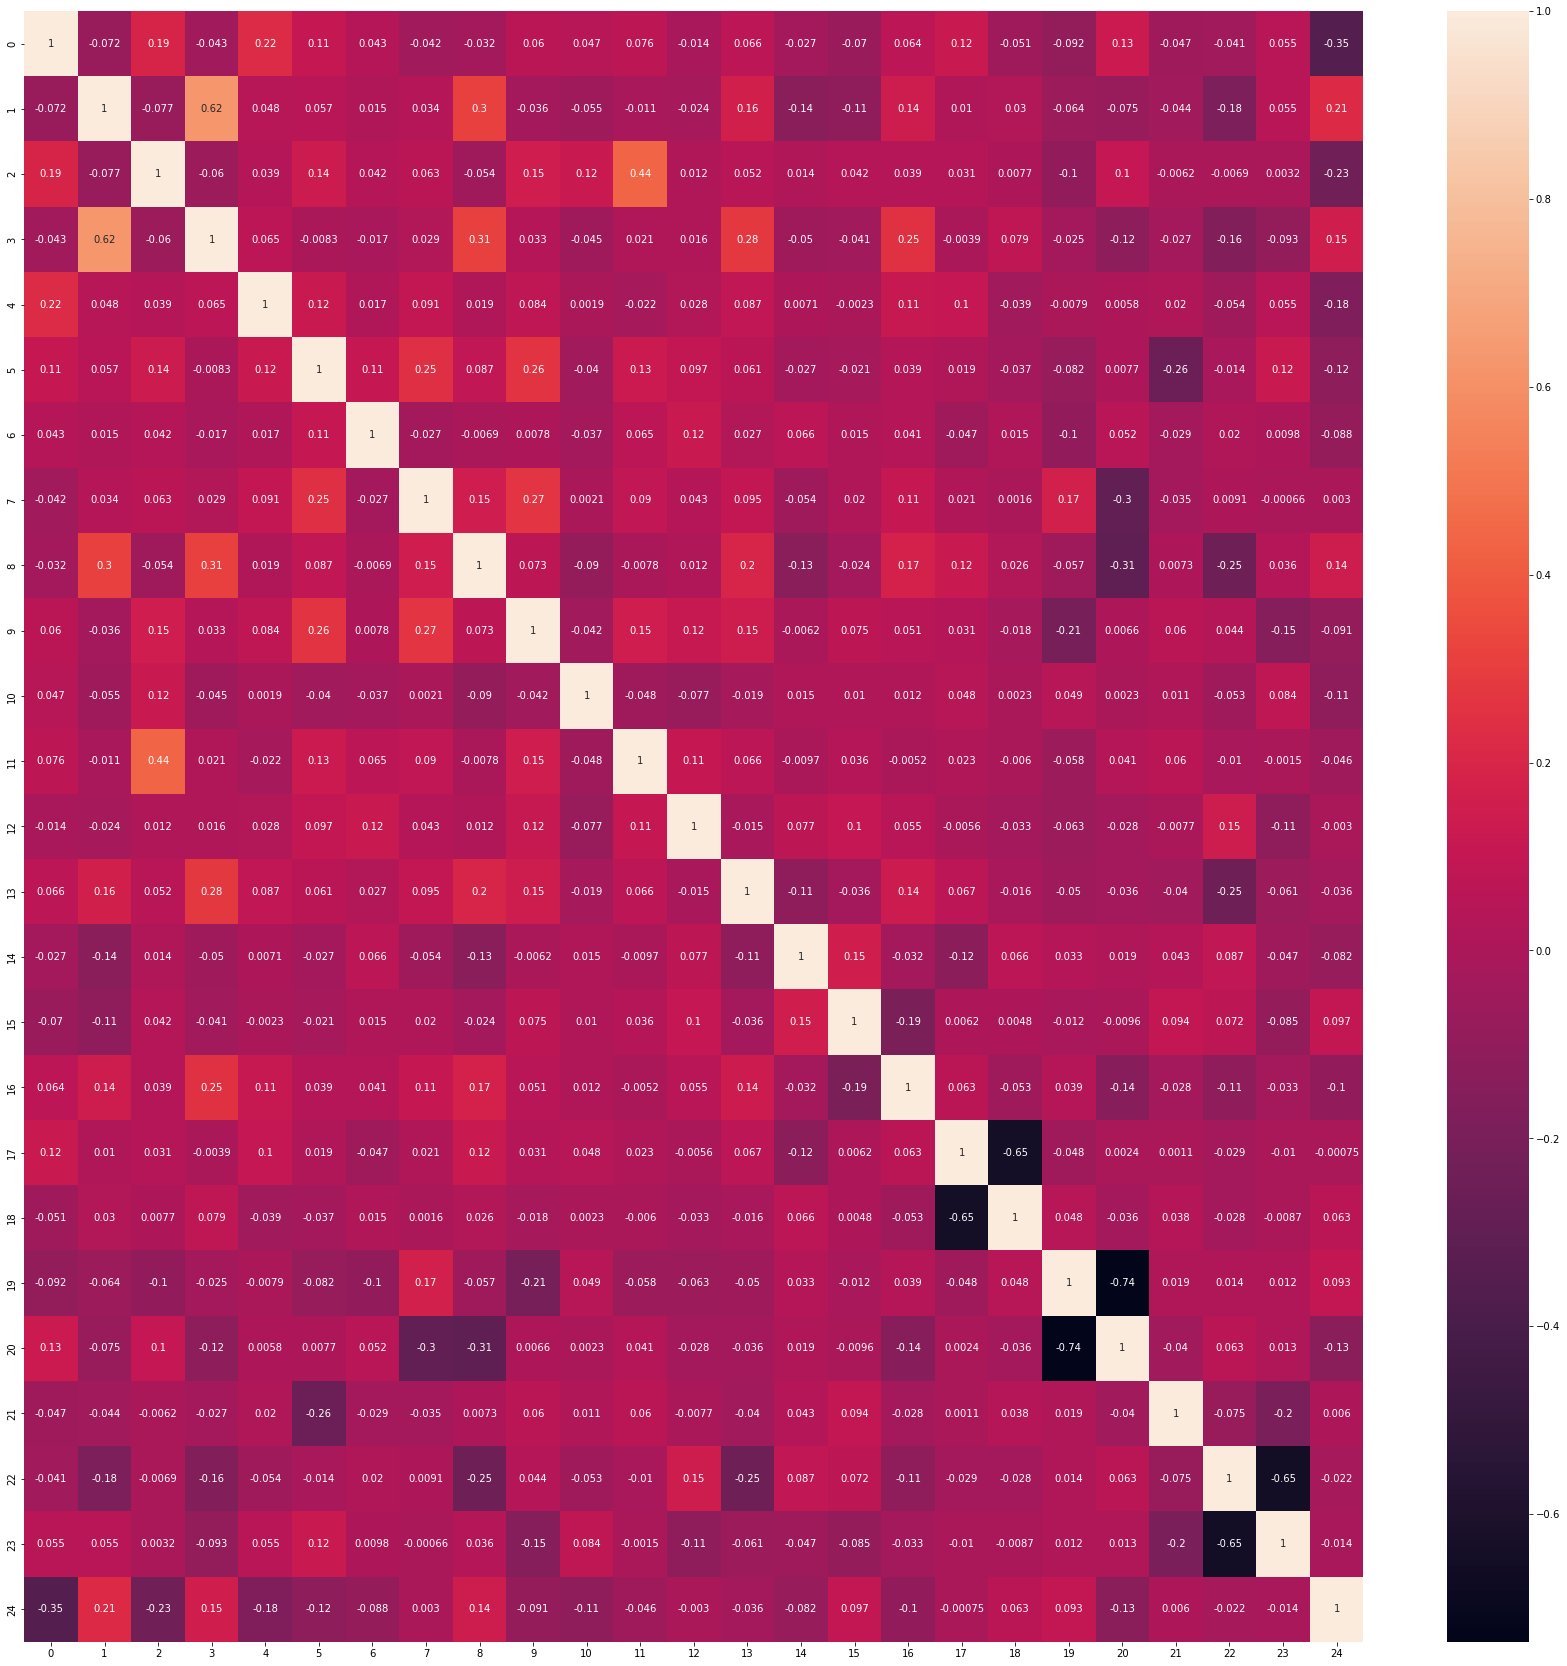

In [63]:
# already done?
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot =True);

### Defining Dictionary of Models

In [64]:
MODELS = {'logistic_r', 'svc', 'tree', 'forest', 'knn', 'adaboost', 'gnb', 'nn'}
german_credit_data_dict = {}  

## Train and Test set

In [87]:
# x = df.iloc[:,:-1]
# # y = df.Class.apply(lambda x: pd.to_numeric(str(x)[2]))
# y = df.iloc[:,-1:]
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.0,6.0,4.0,12.0,5.0,5.0,3.0,4.0,1.0,67.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2.0,48.0,2.0,60.0,1.0,3.0,2.0,2.0,1.0,22.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,4.0,12.0,4.0,21.0,1.0,4.0,3.0,3.0,1.0,49.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,42.0,2.0,79.0,1.0,4.0,3.0,4.0,2.0,45.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,24.0,3.0,49.0,1.0,3.0,3.0,4.0,4.0,53.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [88]:
y.head()

,24
0,1.0
1,2.0
2,1.0
3,1.0
4,2.0


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

y_train = y_train.to_numpy().reshape(-1)
y_test = y_test.to_numpy().reshape(-1)

In [94]:
StScale = StandardScaler()
StScale.fit(X_train)
X_train = StScale.transform(X_train)

X_test = StScale.transform(X_test)

In [98]:
from tabulate import tabulate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def model_results(model):
    table = [["Parameters / Metrics", "Tuned"]]
    curr_model = model['model']
    

    if model['hyperparameters'] == 1:
        for param in curr_model.best_params_:
            table.append([param, curr_model.best_params_[param]])

    prediction = curr_model.predict(X_test)
    print(classification_report(y_test, prediction))
    print(confusion_matrix (y_test, prediction))
    ConfusionMatrixDisplay.from_predictions(y_test, prediction);
    mse = mean_squared_error(y_test, prediction)
    accuracy = accuracy_score(y_test, prediction)
    weighted_f1 = f1_score(y_test, prediction, average='weighted')
    macro_f1 = f1_score(y_test, prediction, average='macro')
    W_recall = recall_score(y_test, prediction,average='weighted')
    malignant_recall = recall_score(y_test, prediction,pos_label=2,average='binary')
    
    table.append(['Accuracy',accuracy])
    table.append(['weighted_f1', weighted_f1])
    table.append(['macro_f1',macro_f1])
    table.append(['weighted_Recall',W_recall])
    table.append(['Class__Recall',malignant_recall])

    
    prediction_trn = curr_model.predict(X_train)
    accuracy_trn = accuracy_score(y_train, prediction_trn)
    weighted_f1_trn = f1_score(y_train, prediction_trn, average='weighted')
    macro_f1_trn = f1_score(y_train, prediction_trn, average='macro')
    W_recall_trn = recall_score(y_train, prediction_trn,average='weighted')
    malignant_recall_trn = recall_score(y_train, prediction_trn,pos_label=2,average='binary')
    
    table.append(['Accuracy (tarin)',accuracy_trn])
    table.append(['weighted_f1 (tarin)', weighted_f1_trn])
    table.append(['macro_f1 (tarin)',macro_f1_trn])
    table.append(['weighted_Recall (tarin)',W_recall_trn])
    table.append(['Class_sign_Recall (tarin)',malignant_recall_trn])
    
    print(tabulate(table, headers='firstrow', tablefmt='grid'))

    return prediction

## 1. LogisticRegression for Classification

In [99]:
logistic_r = LogisticRegression(class_weight='balanced',random_state=0)
logistic_r.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

## LogisticRegression Analysis

              precision    recall  f1-score   support

         1.0       0.85      0.70      0.77       142
         2.0       0.49      0.71      0.58        58

    accuracy                           0.70       200
   macro avg       0.67      0.70      0.67       200
weighted avg       0.75      0.70      0.71       200

[[99 43]
 [17 41]]
+---------------------------+----------+
| Parameters / Metrics      |    Tuned |
+===========================+==========+
| Accuracy                  | 0.7      |
+---------------------------+----------+
| weighted_f1               | 0.712349 |
+---------------------------+----------+
| macro_f1                  | 0.672453 |
+---------------------------+----------+
| weighted_Recall           | 0.7      |
+---------------------------+----------+
| Class__Recall             | 0.706897 |
+---------------------------+----------+
| Accuracy (tarin)          | 0.7475   |
+---------------------------+----------+
| weighted_f1 (tarin)       | 0.755659 

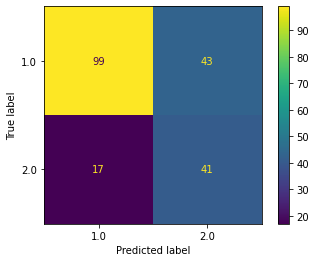

In [100]:
german_credit_data_dict['logistic_r'] = {'model':logistic_r, 'hyperparameters':0}
lr_prediction = model_results(german_credit_data_dict['logistic_r'])

## 2. Support vector classification

In [101]:
svc = SVC().fit(X_train, y_train)

In [102]:
parameters = {
    'C':[0.1,0.01, 0.001, 0.5,0.7,1,10,50, 100,150,170,180,190, 200,220, 250,300,1000],
    'gamma': ['scale','auto',0.1, 0.01,0.02, 0.05, 0.03, 0.07, 0.001, 0.009, 0.008],
}
svc_model = RandomizedSearchCV(svc, parameters, verbose=10, random_state=0).fit(X_train, y_train)
svc_model.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 1/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.700 total time=   0.0s
[CV 2/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 2/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.700 total time=   0.0s
[CV 3/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 3/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.700 total time=   0.0s
[CV 4/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 4/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.694 total time=   0.0s
[CV 5/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 5/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.694 total time=   0.0s
[CV 1/5; 2/10] START C=250, gamma=0.01..........................................
[CV 1/5; 2/10] END ...........C=250, gamma=0.01;

{'gamma': 0.009, 'C': 50}

In [103]:
svc_model.best_estimator_

SVC(C=50, gamma=0.009)

## Support vector classification Analysis

              precision    recall  f1-score   support

         1.0       0.82      0.77      0.79       142
         2.0       0.51      0.59      0.54        58

    accuracy                           0.71       200
   macro avg       0.66      0.68      0.67       200
weighted avg       0.73      0.71      0.72       200

[[109  33]
 [ 24  34]]
+---------------------------+-----------+
| Parameters / Metrics      |     Tuned |
+===========================+===========+
| gamma                     |  0.009    |
+---------------------------+-----------+
| C                         | 50        |
+---------------------------+-----------+
| Accuracy                  |  0.715    |
+---------------------------+-----------+
| weighted_f1               |  0.720596 |
+---------------------------+-----------+
| macro_f1                  |  0.668364 |
+---------------------------+-----------+
| weighted_Recall           |  0.715    |
+---------------------------+-----------+
| Class__Recall     

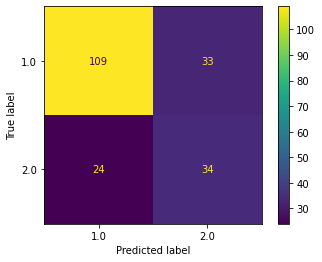

In [104]:
german_credit_data_dict['svc'] = {'model':svc_model, 'hyperparameters':1}
svc_prediction = model_results(german_credit_data_dict['svc'])

              precision    recall  f1-score   support

         1.0       0.82      0.77      0.79       142
         2.0       0.51      0.59      0.54        58

    accuracy                           0.71       200
   macro avg       0.66      0.68      0.67       200
weighted avg       0.73      0.71      0.72       200

[[109  33]
 [ 24  34]]


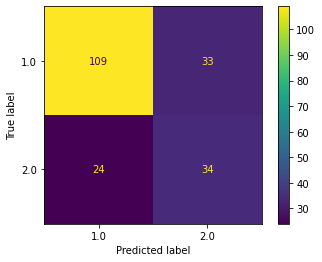

In [105]:
print(classification_report(y_test, svc_prediction))
print(confusion_matrix (y_test, svc_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, svc_prediction);

## Decision tree

In [130]:
tree = DecisionTreeClassifier(class_weight='balanced').fit(X_train, y_train)

In [131]:
parameters = {
    'max_depth': scipy.stats.uniform(1, 100),
    'min_samples_split': scipy.stats.uniform(0, 1) 
}
tree_model = RandomizedSearchCV(tree, parameters, verbose=1, n_iter=20,scoring="f1_weighted", random_state=0).fit(X_train, y_train)
tree_model.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'max_depth': 8.103605819788694, 'min_samples_split': 0.08712929970154071}

## Decision tree Analysis

              precision    recall  f1-score   support

         1.0       0.81      0.56      0.66       142
         2.0       0.39      0.69      0.50        58

    accuracy                           0.59       200
   macro avg       0.60      0.62      0.58       200
weighted avg       0.69      0.59      0.61       200

[[79 63]
 [18 40]]
+---------------------------+-----------+
| Parameters / Metrics      |     Tuned |
+===========================+===========+
| max_depth                 | 8.10361   |
+---------------------------+-----------+
| min_samples_split         | 0.0871293 |
+---------------------------+-----------+
| Accuracy                  | 0.595     |
+---------------------------+-----------+
| weighted_f1               | 0.613472  |
+---------------------------+-----------+
| macro_f1                  | 0.578991  |
+---------------------------+-----------+
| weighted_Recall           | 0.595     |
+---------------------------+-----------+
| Class__Recall         

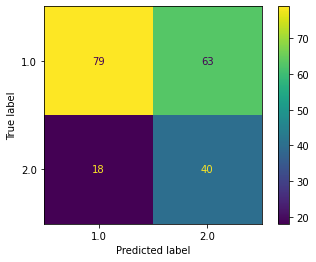

In [129]:
german_credit_data_dict['tree'] = {'model':tree_model, 'hyperparameters':1}
tree_prediction = model_results(german_credit_data_dict['tree'])

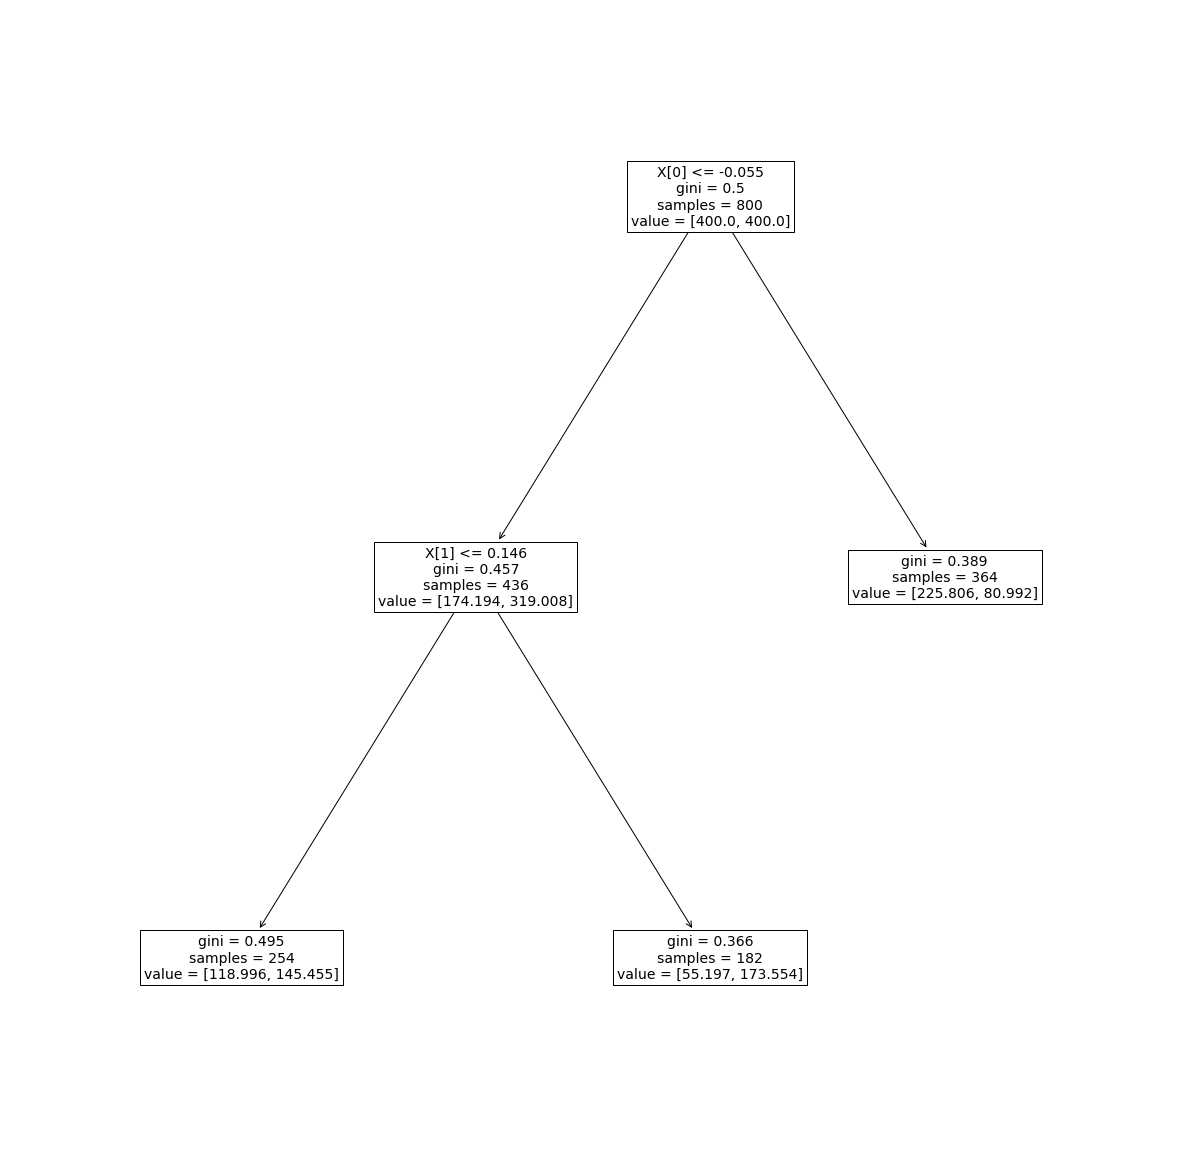

In [110]:
plt.figure(figsize=(21,21))
plot_tree(tree_model.best_estimator_, max_depth = 2, fontsize=14);

## Random Forest

In [111]:
forest = RandomForestClassifier(class_weight='balanced')
forest = forest.fit(X_train, y_train)

In [112]:
parameters = {
    'n_estimators': range(1,200),
    'max_depth': scipy.stats.uniform(1, 150),
    "criterion": ["gini", "entropy"]
}
forest_model = RandomizedSearchCV(forest, parameters,n_jobs=4,cv=3, verbose=1, n_iter=20,scoring="f1_weighted", random_state=0).fit(X_train, y_train)
forest_model.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


{'criterion': 'entropy', 'max_depth': 98.22578080767958, 'n_estimators': 198}

### Random Forest Analysis

              precision    recall  f1-score   support

         1.0       0.78      0.89      0.83       142
         2.0       0.59      0.40      0.47        58

    accuracy                           0.74       200
   macro avg       0.69      0.64      0.65       200
weighted avg       0.73      0.74      0.73       200

[[126  16]
 [ 35  23]]
+---------------------------+---------------------+
| Parameters / Metrics      | Tuned               |
+===========================+=====================+
| criterion                 | entropy             |
+---------------------------+---------------------+
| max_depth                 | 98.22578080767958   |
+---------------------------+---------------------+
| n_estimators              | 198                 |
+---------------------------+---------------------+
| Accuracy                  | 0.745               |
+---------------------------+---------------------+
| weighted_f1               | 0.7280208227008268  |
+-------------------------

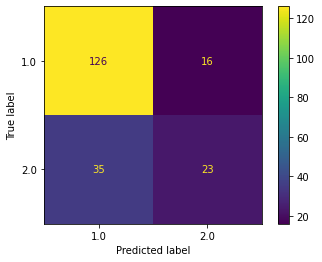

In [114]:
german_credit_data_dict['forest'] = {'model':forest_model, 'hyperparameters':1}
tree_prediction = model_results(german_credit_data_dict['forest'])

## 5. K-nearest neighbours


Fitting and hyperparameter search

In [115]:
from sklearn import neighbors
import sklearn
import scipy

knn = sklearn.neighbors.KNeighborsClassifier(n_jobs=-1)

In [120]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [124]:
param_distribution = {'n_neighbors': range(1, 150), 'weights':['uniform', 'distance'],
                      'leaf_size': scipy.stats.uniform(1, 50),
                     'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_randomized = sklearn.model_selection.RandomizedSearchCV(knn, param_distribution, verbose=1,scoring="f1_weighted", random_state=0, cv=3, n_iter=25).fit(X_train, y_train)

print('best Hyperparameters = ' + str(knn_randomized.best_params_))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
best Hyperparameters = {'algorithm': 'auto', 'leaf_size': 49.9309171116382, 'n_neighbors': 30, 'weights': 'distance'}


              precision    recall  f1-score   support

         1.0       0.74      0.93      0.82       142
         2.0       0.55      0.21      0.30        58

    accuracy                           0.72       200
   macro avg       0.64      0.57      0.56       200
weighted avg       0.68      0.72      0.67       200

[[132  10]
 [ 46  12]]
+---------------------------+---------------------+
| Parameters / Metrics      | Tuned               |
+===========================+=====================+
| algorithm                 | auto                |
+---------------------------+---------------------+
| leaf_size                 | 49.9309171116382    |
+---------------------------+---------------------+
| n_neighbors               | 30                  |
+---------------------------+---------------------+
| weights                   | distance            |
+---------------------------+---------------------+
| Accuracy                  | 0.72                |
+-------------------------

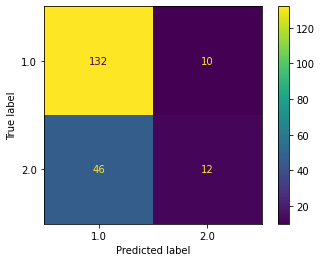

In [139]:
german_credit_data_dict["knn"] = {"model":knn_randomized, "hyperparameters":1}
knn_prediction = model_results(german_credit_data_dict['knn'])

## 6. AdaBoost Classification

Fitting and Hyperparameter search 

In [134]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier().fit(X_train,y_train)

In [136]:
param_distribution = {'n_estimators': range(1, 250), 'learning_rate': scipy.stats.uniform(.1, 5)}
adaBoost_randomized = sklearn.model_selection.RandomizedSearchCV(adaBoost, param_distribution, verbose=1,scoring="f1_weighted", random_state=0, cv=5, n_iter=50).fit(X_train, y_train)

print('Best Hyperparameters = ' + str(adaBoost_randomized.best_params_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters = {'learning_rate': 1.1443837804741737, 'n_estimators': 132}


              precision    recall  f1-score   support

         1.0       0.84      0.85      0.84       142
         2.0       0.61      0.60      0.61        58

    accuracy                           0.78       200
   macro avg       0.73      0.72      0.73       200
weighted avg       0.77      0.78      0.77       200

[[120  22]
 [ 23  35]]
+---------------------------+------------+
| Parameters / Metrics      |      Tuned |
+===========================+============+
| learning_rate             |   1.14438  |
+---------------------------+------------+
| n_estimators              | 132        |
+---------------------------+------------+
| Accuracy                  |   0.775    |
+---------------------------+------------+
| weighted_f1               |   0.774416 |
+---------------------------+------------+
| macro_f1                  |   0.7254   |
+---------------------------+------------+
| weighted_Recall           |   0.775    |
+---------------------------+------------+
| Cla

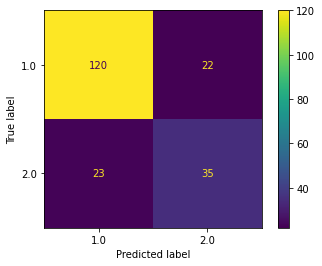

In [140]:
german_credit_data_dict["adaboost"] = {"model":adaBoost_randomized, "hyperparameters":1}
adaboost_prediction = model_results(german_credit_data_dict['adaboost'])

## 7. Gaussian Naive Bayes classification

In [142]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB().fit(X_train, y_train)

In [143]:
# param_distribution = {'n_estimators': range(1, 150), 'learning_rate': scipy.stats.reciprocal(1, 5)}
# adaBoost_randomized = sklearn.model_selection.RandomizedSearchCV(adaBoost, param_distribution, verbose=1, random_state=0, cv=3, n_iter=250).fit(X_train, y_train)
# print('Best Hyperparameters = ' + str(knn_randomized.best_params_))

              precision    recall  f1-score   support

         1.0       0.83      0.75      0.79       142
         2.0       0.50      0.62      0.55        58

    accuracy                           0.71       200
   macro avg       0.66      0.68      0.67       200
weighted avg       0.73      0.71      0.72       200

[[106  36]
 [ 22  36]]
+---------------------------+----------+
| Parameters / Metrics      |    Tuned |
+===========================+==========+
| Accuracy                  | 0.71     |
+---------------------------+----------+
| weighted_f1               | 0.718097 |
+---------------------------+----------+
| macro_f1                  | 0.669516 |
+---------------------------+----------+
| weighted_Recall           | 0.71     |
+---------------------------+----------+
| Class__Recall             | 0.62069  |
+---------------------------+----------+
| Accuracy (tarin)          | 0.7375   |
+---------------------------+----------+
| weighted_f1 (tarin)       | 0.742

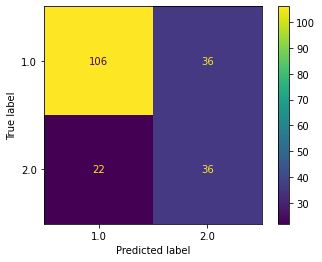

In [144]:
german_credit_data_dict["gnb"] = {"model":naive_bayes, "hyperparameters":0}
naive_bayes_prediction = model_results(german_credit_data_dict['gnb'])

## 8. Neural Network classification

In [146]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=900)

In [147]:
param_distribution = {'max_iter': range(1000, 1500),
                        'alpha': scipy.stats.reciprocal(0.00001, 0.1), 
                        'learning_rate':['constant', 'invscaling', 'adaptive']}

mlp_randomized = sklearn.model_selection.RandomizedSearchCV(mlp, param_distribution, verbose=1, random_state=0,n_jobs=4 cv=3, n_iter=25).fit(X_train, y_train)
print('Best Hyperparameters = ' + str(knn_randomized.best_params_))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Hyperparameters = {'algorithm': 'auto', 'leaf_size': 49.9309171116382, 'n_neighbors': 30, 'weights': 'distance'}


              precision    recall  f1-score   support

         1.0       0.81      0.76      0.78       142
         2.0       0.48      0.55      0.52        58

    accuracy                           0.70       200
   macro avg       0.65      0.66      0.65       200
weighted avg       0.71      0.70      0.71       200

[[108  34]
 [ 26  32]]
+---------------------------+-----------------------+
| Parameters / Metrics      | Tuned                 |
+===========================+=======================+
| alpha                     | 0.0003515247633199259 |
+---------------------------+-----------------------+
| learning_rate             | constant              |
+---------------------------+-----------------------+
| max_iter                  | 1105                  |
+---------------------------+-----------------------+
| Accuracy                  | 0.7                   |
+---------------------------+-----------------------+
| weighted_f1               | 0.7053295932678822    |
+-

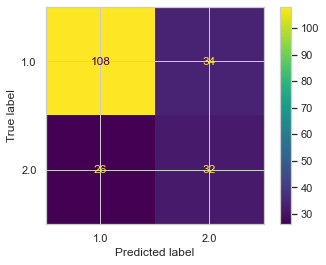

In [151]:
german_credit_data_dict["nn"] = {"model":mlp_randomized, "hyperparameters":1}
nn_prediction = model_results(german_credit_data_dict['nn'])

--------------

## German_Credit_Data Analysis

+------------+-------+----------+---------+------------+----------+-----------+------------+---------------+
| model      |   acc |     w.f1 |   w.rec |   clas.rec |   tr.acc |   tr.w.f1 |   tr.w.rec |   tr.clas.rec |
+============+=======+==========+=========+============+==========+===========+============+===============+
| adaboost   | 0.775 | 0.774416 |   0.775 |   0.603448 |  0.82375 |  0.819002 |    0.82375 |      0.628099 |
+------------+-------+----------+---------+------------+----------+-----------+------------+---------------+
| knn        | 0.72  | 0.67275  |   0.72  |   0.206897 |  1       |  1        |    1       |      1        |
+------------+-------+----------+---------+------------+----------+-----------+------------+---------------+
| nn         | 0.7   | 0.70533  |   0.7   |   0.551724 |  1       |  1        |    1       |      1        |
+------------+-------+----------+---------+------------+----------+-----------+------------+---------------+
| svc        | 0.71

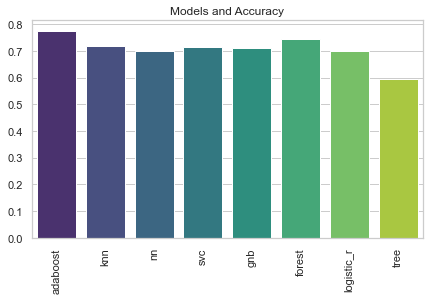

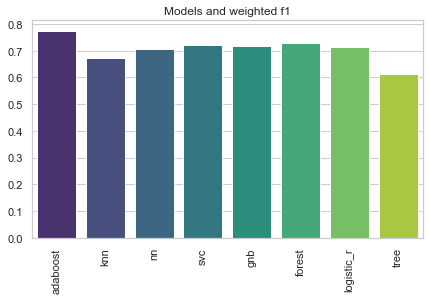

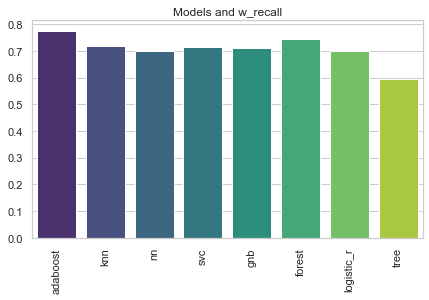

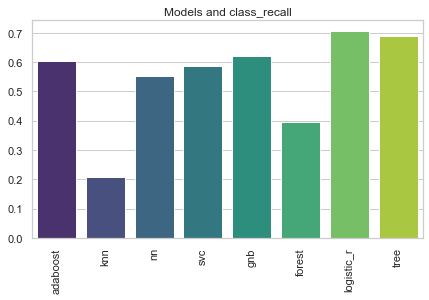

In [152]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,make_scorer,ConfusionMatrixDisplay,recall_score ,classification_report,accuracy_score,f1_score


def cross_checking_model_results(dictionary):
    table = [["model", "acc", "w.f1", 'w.rec', 'clas.rec',
              'tr.acc','tr.w.f1', 'tr.w.rec', 'tr.clas.rec']]
    x_models = []
    y_accuracy = []
    y_wf1 = []
    w_recall = []
    m_recall = []
    
    trny_accuracy = []
    trny_wf1 = []
    trnw_recall = []
    trnm_recall = []

    for model_key in MODELS:
        model = dictionary[model_key]['model']
        
        prediction = model.predict(X_test)
        accuracy = accuracy_score(y_test, prediction)
        weighted_f1 = f1_score(y_test, prediction, average='weighted')
        W_recall = recall_score(y_test, prediction,average='weighted')
        malignant_recall = recall_score(y_test, prediction,pos_label=2,average='binary')
        
        prediction_trn = model.predict(X_train)
        accuracy_trn = accuracy_score(y_train, prediction_trn)
        weighted_f1_trn = f1_score(y_train, prediction_trn, average='weighted')
        W_recall_trn = recall_score(y_train, prediction_trn,average='weighted')
        malignant_recall_trn = recall_score(y_train, prediction_trn,pos_label=2,average='binary')
        table.append([model_key, accuracy, weighted_f1, W_recall,malignant_recall,
                     accuracy_trn, weighted_f1_trn, W_recall_trn,malignant_recall_trn])
        
        x_models.append(model_key)
        y_accuracy.append(accuracy)
        y_wf1.append(weighted_f1)
        w_recall.append(W_recall)
        m_recall.append(malignant_recall)
        
        trny_accuracy.append(accuracy_trn)
        trny_wf1.append(weighted_f1_trn)
        trnw_recall.append(W_recall_trn)
        trnm_recall.append(malignant_recall_trn)
    print(tabulate(table, headers='firstrow', tablefmt='grid'))
    
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(7,4))
    ax1 = sns.barplot(x=x_models, y=y_accuracy, palette="viridis")
    ax1.set_title('Models and Accuracy')
    ax1.set_xticklabels(labels=x_models, rotation=90)
    plt.figure(figsize=(7,4))
    ax2 = sns.barplot(x=x_models, y=y_wf1, palette="viridis")
    ax2.set_title('Models and weighted f1')
    ax2.set_xticklabels(labels=x_models, rotation=90)
    
    plt.figure(figsize=(7,4))
    ax2 = sns.barplot(x=x_models, y=w_recall, palette="viridis")
    ax2.set_title('Models and w_recall')
    ax2.set_xticklabels(labels=x_models, rotation=90)
    plt.figure(figsize=(7,4))
    ax2 = sns.barplot(x=x_models, y=m_recall, palette="viridis")
    ax2.set_title('Models and class_recall')
    ax2.set_xticklabels(labels=x_models, rotation=90)


cross_checking_model_results(german_credit_data_dict)